In [29]:
## Add library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import matplotlib.pyplot as plt
#from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [30]:
# set data path
dataset_path = '/content/drive/MyDrive/flower'

In [31]:
## Resize và tăng cường dữ liệu
## Resize image
image_size = (150,150)
TRAINING_DATA_DIR = str(dataset_path)
print(TRAINING_DATA_DIR)

# Modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) 

# Validation data modify 
valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", shuffle=True, target_size=image_size)

# Train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=image_size)

/content/drive/MyDrive/flower
Found 15 images belonging to 4 classes.
Found 62 images belonging to 4 classes.


In [32]:
## Labels and match class
image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 4)
labels:  ['Cuc' 'Mattroi' 'Thuocduoc' 'Vantho']
match class:  {'cuc': 0, 'mattroi': 1, 'thuocduoc': 2, 'vantho': 3}


In [34]:
model=Sequential()

# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history=model.fit(train_generator,epochs=100,batch_size=64,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model.save('flower_detec.h5')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

Sai số là:  1.667000219640613e-06
Độ chính xác là:  1.0


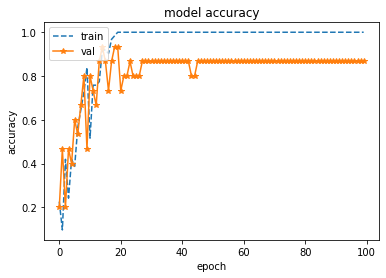

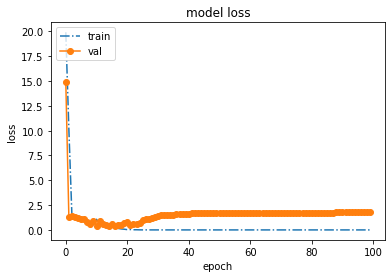

In [35]:
# Đánh giá độ chính xác của CNN
score = model.evaluate(train_generator, verbose = 0)
print('Sai số là: ', score[0])
print('Độ chính xác là: ', score[1])


## Model accurary
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'],'-*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()
## Model loss
plt.plot(history.history['loss'],'-.')
plt.plot(history.history['val_loss'],'-o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

Cuc Vang


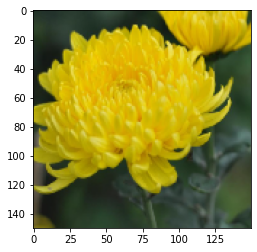

In [40]:
# Test
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
# Load and define image - to test
img = load_img('cuc_test.png', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
# predict 
guess=np.argmax(model.predict(img),axis=1)

if guess[0]==0:
  print("Cuc Vang")
if guess[0]==1:
  print("Huong Duong")
if guess[0]==2:
  print("Thuoc Duoc Do")
if guess[0]==3:
  print("Van Tho")


Thuoc Duoc Do


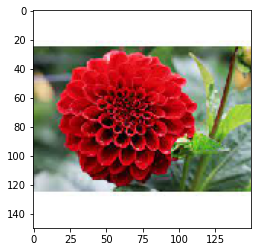

In [42]:
img = load_img('td_test.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
# predict 
guess=np.argmax(model.predict(img),axis=1)

if guess[0]==0:
  print("Cuc Vang")
if guess[0]==1:
  print("Huong Duong")
if guess[0]==2:
  print("Thuoc Duoc Do")
if guess[0]==3:
  print("Van Tho")


Huong Duong


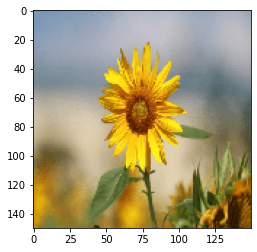

In [43]:
img = load_img('mt_test.png', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
# predict 
guess=np.argmax(model.predict(img),axis=1)

if guess[0]==0:
  print("Cuc Vang")
if guess[0]==1:
  print("Huong Duong")
if guess[0]==2:
  print("Thuoc Duoc Do")
if guess[0]==3:
  print("Van Tho")


Van Tho


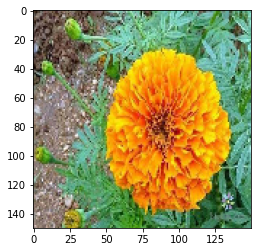

In [44]:
img = load_img('vt_test.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
# predict 
guess=np.argmax(model.predict(img),axis=1)

if guess[0]==0:
  print("Cuc Vang")
if guess[0]==1:
  print("Huong Duong")
if guess[0]==2:
  print("Thuoc Duoc Do")
if guess[0]==3:
  print("Van Tho")
